In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Financial Data Analysis
import yfinance as yf
import ta
import quantstats as qs

# Machine Learning 
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv('data/BTC-USDT.csv')
df

date      open      high       low     close       volume
0      1502942400000   4261.48   4313.62   4261.32   4308.83    47.181009
1      1502946000000   4308.83   4328.69   4291.37   4315.32    23.234916
2      1502949600000   4330.29   4345.45   4309.37   4324.35     7.229691
3      1502953200000   4316.62   4349.99   4287.41   4349.99     4.443249
4      1502956800000   4333.32   4377.85   4333.32   4360.69     0.972807
...              ...       ...       ...       ...       ...          ...
51404  1688364000000  30673.61  30678.41  30606.00  30651.25  1036.522350
51405  1688367600000  30651.25  30759.80  30636.65  30667.19  1758.796390
51406  1688371200000  30667.19  30700.92  30599.07  30640.12  1390.909010
51407  1688374800000  30640.11  30670.00  30602.29  30610.61   833.620010
51408  1688378400000  30610.60  30623.08  30605.66  30615.85    91.875210

[51409 rows x 6 columns]

In [4]:
df['date'] = pd.to_datetime(df['date'], unit='ms')
df

date      open      high       low     close       volume
0     2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83    47.181009
1     2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32    23.234916
2     2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35     7.229691
3     2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99     4.443249
4     2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69     0.972807
...                   ...       ...       ...       ...       ...          ...
51404 2023-07-03 06:00:00  30673.61  30678.41  30606.00  30651.25  1036.522350
51405 2023-07-03 07:00:00  30651.25  30759.80  30636.65  30667.19  1758.796390
51406 2023-07-03 08:00:00  30667.19  30700.92  30599.07  30640.12  1390.909010
51407 2023-07-03 09:00:00  30640.11  30670.00  30602.29  30610.61   833.620010
51408 2023-07-03 10:00:00  30610.60  30623.08  30605.66  30615.85    91.875210

[51409 rows x 6 columns]

In [9]:
# Data Splitting
train = df[df['date'].dt.year <= 2020]
test = df[df['date'].dt.year >= 2020]

In [10]:
# Creating a Candlestick chart for Apple stocks
candlestick = go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                increasing=dict(line=dict(color='black')),
                decreasing=dict(line=dict(color='red')),
                showlegend=False)

In [11]:
# Layout
layout = go.Layout(
    title='BTC  Price',
    yaxis=dict(title='Price (USD)'),
    xaxis=dict(title='Date'),
    template = 'ggplot2',
    xaxis_rangeslider_visible=False,
    yaxis_gridcolor='white',
    xaxis_gridcolor='white',
    yaxis_tickfont=dict(color='black'),
    xaxis_tickfont=dict(color='black'),
    margin=dict(t=50,l=50,r=50,b=50)
)


In [12]:
fig = go.Figure(data=[candlestick], layout=layout)

# Plotting annotation
fig.add_annotation(text='BTC',
                    font=dict(color='gray', size=30),
                    xref='paper', yref='paper',
                    x=0.5, y=0.5,
                    showarrow=False,
                    opacity=1.0)

fig.show()

In [13]:
# Adding Close_Shift Variable 
train['close_shift'] = train['close'].shift(1)
test['close_shift'] = test['close'].shift(1)

# Adding Daily Returns variable 
train['return'] = (train['close']/train['close_shift'] - 1) * 100
test['return'] = (test['close']/test['close_shift'] - 1) * 100

In [26]:
train

date      open      high       low     close  \
0     2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83   
1     2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32   
2     2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35   
3     2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99   
4     2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69   
...                   ...       ...       ...       ...       ...   
29469 2020-12-31 19:00:00  28872.24  29000.00  28742.41  28897.83   
29470 2020-12-31 20:00:00  28897.84  29139.65  28862.00  29126.70   
29471 2020-12-31 21:00:00  29126.71  29169.55  28900.79  28966.36   
29472 2020-12-31 22:00:00  28966.36  29143.73  28910.19  29100.84   
29473 2020-12-31 23:00:00  29100.83  29110.35  28780.00  28923.63   

            volume  close_shift    return  
0        47.181009          NaN       NaN  
1        23.234916      4308.83  0.150621  
2         7.229691      4315.32  0.209254  
3         4.443249      4324.35  0.592921  
4         0.972807      4349.99  0.245978  
...            ...          ...       ...  
29469  2293.821339     28872.25  0.088597  
29470  1936.480299     28897.83  0.791997  
29471  2524.473111     29126.70 -0.550491  
29472  1438.506326     28966.36  0.464263  
29473  1976.419299     29100.84 -0.608951  

[29474 rows x 8 columns]

In [27]:
test

date      open      high       low     close  \
20708 2020-01-01 00:00:00   7195.24   7196.25   7175.46   7177.02   
20709 2020-01-01 01:00:00   7176.47   7230.00   7175.71   7216.27   
20710 2020-01-01 02:00:00   7215.52   7244.87   7211.41   7242.85   
20711 2020-01-01 03:00:00   7242.66   7245.00   7220.00   7225.01   
20712 2020-01-01 04:00:00   7225.00   7230.00   7215.03   7217.27   
...                   ...       ...       ...       ...       ...   
51404 2023-07-03 06:00:00  30673.61  30678.41  30606.00  30651.25   
51405 2023-07-03 07:00:00  30651.25  30759.80  30636.65  30667.19   
51406 2023-07-03 08:00:00  30667.19  30700.92  30599.07  30640.12   
51407 2023-07-03 09:00:00  30640.11  30670.00  30602.29  30610.61   
51408 2023-07-03 10:00:00  30610.60  30623.08  30605.66  30615.85   

            volume  close_shift    return  
20708   511.814901          NaN       NaN  
20709   883.052603      7177.02  0.546884  
20710   655.156809      7216.27  0.368334  
20711   783.724867      7242.85 -0.246312  
20712   467.812578      7225.01 -0.107128  
...            ...          ...       ...  
51404  1036.522350     30673.62 -0.072929  
51405  1758.796390     30651.25  0.052004  
51406  1390.909010     30667.19 -0.088270  
51407   833.620010     30640.12 -0.096312  
51408    91.875210     30610.61  0.017118  

[30701 rows x 8 columns]

In [14]:
# Creating target variable on both datasets
train['target'] = np.where(train['return'].shift(-1) > 0, 1, 0)
test['target'] = np.where(test['return'].shift(-1) > 0, 1, 0)

In [30]:
train.head(15)

date     open     high      low    close     volume  \
0  2017-08-17 04:00:00  4261.48  4313.62  4261.32  4308.83  47.181009   
1  2017-08-17 05:00:00  4308.83  4328.69  4291.37  4315.32  23.234916   
2  2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35   7.229691   
3  2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99   4.443249   
4  2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   0.972807   
5  2017-08-17 09:00:00  4360.00  4445.78  4360.00  4444.00  10.763623   
6  2017-08-17 10:00:00  4441.10  4470.00  4399.81  4460.00  24.865399   
7  2017-08-17 11:00:00  4460.00  4485.39  4427.30  4427.30  27.018053   
8  2017-08-17 12:00:00  4436.06  4449.56  4411.00  4411.00  23.032398   
9  2017-08-17 13:00:00  4411.00  4459.00  4411.00  4459.00  31.312436   
10 2017-08-17 14:00:00  4459.00  4485.39  4435.93  4470.82  51.735897   
11 2017-08-17 15:00:00  4470.82  4470.82  4333.42  4352.34  68.481270   
12 2017-08-17 16:00:00  4352.33  4354.35  4255.30  4354.18  67.458791   
13 2017-08-17 17:00:00  4354.18  4354.84  4235.45  4289.24  59.664912   
14 2017-08-17 18:00:00  4289.24  4302.45  4218.68  4256.97  51.275163   

    close_shift    return  target  
0           NaN       NaN       1  
1       4308.83  0.150621       1  
2       4315.32  0.209254       1  
3       4324.35  0.592921       1  
4       4349.99  0.245978       1  
5       4360.69  1.910477       1  
6       4444.00  0.360036       0  
7       4460.00 -0.733184       0  
8       4427.30 -0.368170       1  
9       4411.00  1.088189       1  
10      4459.00  0.265082       0  
11      4470.82 -2.650073       1  
12      4352.34  0.042276       0  
13      4354.18 -1.491440       0  
14      4289.24 -0.752348       1

In [15]:
X_train = train.drop('target', axis = 1) # Selecting Predictor Variables
y_train = train.target # Selecting Target Variable
X_test = test.drop('target', axis = 1) # Selecting Predictor Variables
y_test = test.target # Selecting Target Variable

In [16]:
# Defining feature engineering function
def feature_engineering(df):
    
    # Adding Simple Moving Averages
    df['sma5'] = ta.trend.sma_indicator(df['close'],window = 5)
    df['sma10'] = ta.trend.sma_indicator(df['close'],window = 10)
    df['sma15'] = ta.trend.sma_indicator(df['close'],window = 15)
    df['sma20'] = ta.trend.sma_indicator(df['close'],window = 20)
    df['sma30'] = ta.trend.sma_indicator(df['close'],window = 30)
    df['sma50'] = ta.trend.sma_indicator(df['close'],window = 50)
    df['sma80'] = ta.trend.sma_indicator(df['close'],window = 80)
    df['sma100'] = ta.trend.sma_indicator(df['close'],window = 100)
    df['sma200'] = ta.trend.sma_indicator(df['close'],window = 200)
    
    # Adding Price to Simple Moving Averages ratios

    df['sma5_ratio'] = df['close'] / df['sma5']
    df['sma10_ratio'] = df['close'] / df['sma10']
    df['sma20_ratio'] = df['close'] / df['sma20']
    df['sma30_ratio'] = df['close'] / df['sma30'] 
    df['sma50_ratio'] = df['close'] / df['sma50']
    df['sma80_ratio'] = df['close'] / df['sma80']
    df['sma100_ratio'] = df['close'] / df['sma100']
    df['sma200_ratio'] = df['close'] / df['sma200']

    # Adding RSI, CCI, Bollinger Bands, and OBV

    df['rsi'] = ta.momentum.RSIIndicator(df['close']).rsi()
    df['cci'] = ta.trend.cci(df['high'], df['low'], df['close'], window=20, constant=0.015)
    bb_indicator = ta.volatility.BollingerBands(df['close'])
    df['bb_high'] = bb_indicator.bollinger_hband()
    df['bb_low'] = bb_indicator.bollinger_lband()
    df['obv'] = ta.volume.OnBalanceVolumeIndicator(close=df['close'], volume=df['volume']).on_balance_volume()

    # Adding features derived from the indicators above

    df['rsi_overbought'] = (df['rsi'] >= 70).astype(int)
    df['rsi_oversold'] = (df['rsi'] <= 30).astype(int)
    df['above_bb_high'] = (df['close'] >= df['bb_high']).astype(int)
    df['below_bb_low'] = (df['close'] <= df['bb_low']).astype(int)
    df['obv_divergence_10_days'] = df['obv'].diff().rolling(10).sum() - df['close'].diff().rolling(10).sum()
    df['obv_divergence_20_days'] = df['obv'].diff().rolling(20).sum() - df['close'].diff().rolling(20).sum()
    df['cci_high'] = (df['cci'] >= 120).astype(int)
    df['cci_low'] = (df['cci'] <= -120).astype(int)
    df['sma5 > sma10'] = (df['sma5'] > df['sma10']).astype(int)
    df['sma10 > sma15'] = (df['sma10'] > df['sma15']).astype(int)
    df['sma15 > sma20'] = (df['sma15'] > df['sma20']).astype(int)
    df['sma20 > sma30'] = (df['sma20'] > df['sma30']).astype(int)
    df['sma30 > sma50'] = (df['sma30'] > df['sma50']).astype(int)
    df['sma50 > sma80'] = (df['sma50'] > df['sma80']).astype(int)
    df['sma80 > sma100'] = (df['sma80'] > df['sma100']).astype(int)
    df['sma100 > sma200'] = (df['sma100'] > df['sma200']).astype(int)

    # Removing NaN values from the dataframe 
    df.dropna(inplace = True)
    return df


In [17]:
# Applying function to the X_train and X_test sets 
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

In [18]:
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [19]:
# Creating a list of different classification models 
classifiers = [
    # LogisticRegression(random_state = 42),
    # XGBClassifier(random_state = 42),
    # LGBMClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, verbose = False),
    # AdaBoostClassifier(random_state = 42),
    # RandomForestClassifier(random_state = 42)
]

#  Iteraring over classifiers in the list above, training, and evaluating them
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_pred)
    print(f'{type(clf).__name__}: AUC Score={auc_score:.3f}')

CatBoostClassifier: AUC Score=0.591


In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Learning rate set to 0.043564
0:	learn: 0.6924363	total: 5.68ms	remaining: 5.67s
1:	learn: 0.6917482	total: 11.4ms	remaining: 5.71s
2:	learn: 0.6911144	total: 16.3ms	remaining: 5.43s
3:	learn: 0.6904739	total: 21.2ms	remaining: 5.29s
4:	learn: 0.6898953	total: 26.3ms	remaining: 5.24s
5:	learn: 0.6893641	total: 30.6ms	remaining: 5.07s
6:	learn: 0.6888213	total: 34.2ms	remaining: 4.86s
7:	learn: 0.6883932	total: 39ms	remaining: 4.84s
8:	learn: 0.6879279	total: 43.3ms	remaining: 4.76s
9:	learn: 0.6874888	total: 47.2ms	remaining: 4.68s
10:	learn: 0.6870776	total: 51.6ms	remaining: 4.64s
11:	learn: 0.6866829	total: 56ms	remaining: 4.61s
12:	learn: 0.6863272	total: 60.3ms	remaining: 4.58s
13:	learn: 0.6860082	total: 64.4ms	remaining: 4.54s
14:	learn: 0.6856517	total: 68.4ms	remaining: 4.49s
15:	learn: 0.6853536	total: 73.4ms	remaining: 4.51s
16:	learn: 0.6850674	total: 77.8ms	remaining: 4.5s
17:	learn: 0.6846998	total: 82.2ms	remaining: 4.48s
18:	learn: 0.6844145	total: 85.9ms	remaining: 4.4

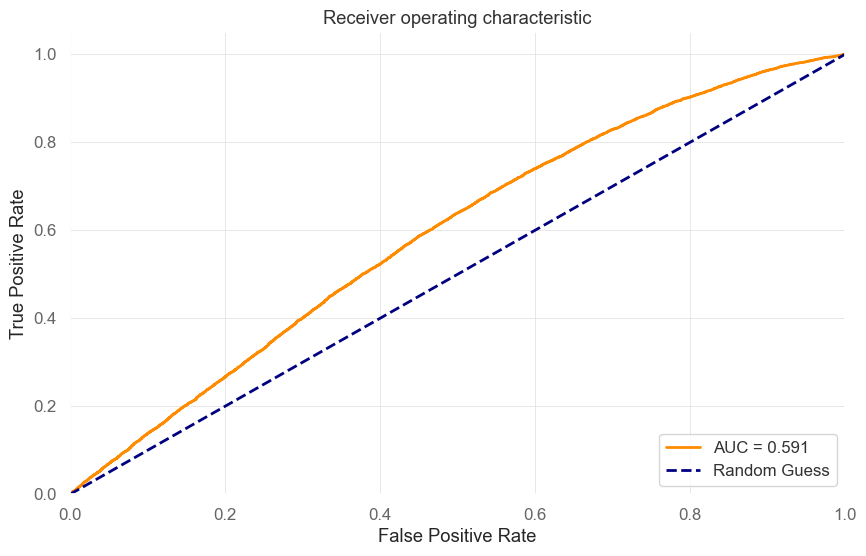

In [21]:
# Creating AdaBoostClassifier Model 
model = CatBoostClassifier(random_state = 42)

# Training and running predictions on the testing set
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_pred)
print(f'\n Model AUC Score = {auc_score:.3f} \n')

# Plotting AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.style.use('seaborn-v0_8-dark')
plt.grid(True)
plt.show()

In [23]:
model.save_model('./btc_classifier.cbm')

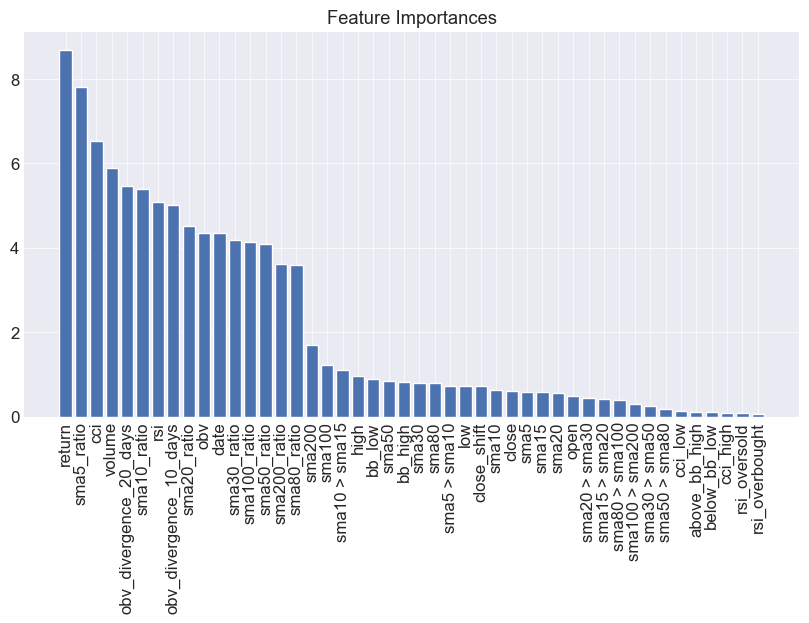

In [45]:
# Plotting Feature Importances 
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.grid(True)
plt.show()

In [46]:
y_pred

array([0.49498565, 0.59583636, 0.61720315, ..., 0.60809737, 0.54999312,
       0.56102852], shape=(30502,))

In [47]:
quantile_intervals = np.arange(0, 1.125, 0.125) # Creating intervals for the quantiles 
quantile_values = np.quantile(y_pred, quantile_intervals) # Dividing y_pred in 8 different quantiles
classes = pd.cut(y_pred, quantile_values) # Grouping probabilities according to the quantiles 
X_test['y_true'] = y_test # Creating a new column in the X_test set containing the true label values 
table = pd.crosstab(classes, X_test['y_true']) # Creating a table counting true labels according to each probability range 
table

y_true              0     1
row_0                      
(0.0627, 0.426]  2571  1241
(0.426, 0.484]   2193  1620
(0.484, 0.526]   1943  1869
(0.526, 0.566]   1815  1998
(0.566, 0.606]   1679  2134
(0.606, 0.653]   1596  2216
(0.653, 0.712]   1640  2173
(0.712, 0.938]   1582  2231

In [48]:
sign = np.zeros_like(y_pred) # Creating an array with 0s in the same length as y_pred

# Short selling signal 
sign[((y_pred >= 0.3477) & (y_pred < 0.5087)) | ((y_pred > 0.5189) & (y_pred < 0.5195))] = -1 

# Buying signal 
sign[((y_pred >= 0.5087) & (y_pred <= 0.5189)) | 
            ((y_pred >= 0.5195) & (y_pred <= 0.5252))] = 1

# Display signal values 
sign

array([-1.,  0.,  0., ...,  0.,  0.,  0.], shape=(30502,))

In [49]:
X_test['sign'] = sign 

In [51]:
X_test['position'] = X_test['sign'].shift(1) # Creating 'position' attribute
X_test['model_returns'] = X_test['position'] * X_test['return'] # Creating 'daily returns' attribute for the strategy

In [53]:
X_test.head(20)

date     open     high      low    close       volume  \
20907 2020-01-09 07:00:00  7908.71  7976.67  7903.40  7949.84  2449.538328   
20908 2020-01-09 08:00:00  7949.57  7955.83  7909.30  7933.10  1641.494387   
20909 2020-01-09 09:00:00  7932.51  7932.94  7864.24  7872.35  3408.741356   
20910 2020-01-09 10:00:00  7872.36  7934.78  7852.01  7896.38  2923.998132   
20911 2020-01-09 11:00:00  7895.56  7901.99  7855.00  7878.56  1911.857856   
20912 2020-01-09 12:00:00  7878.02  7917.68  7871.00  7900.91  2162.941372   
20913 2020-01-09 13:00:00  7901.49  7945.00  7891.43  7897.52  2859.442366   
20914 2020-01-09 14:00:00  7897.54  7919.59  7875.55  7885.50  1887.759463   
20915 2020-01-09 15:00:00  7885.50  7930.00  7882.75  7907.05  1555.442519   
20916 2020-01-09 16:00:00  7907.05  7920.01  7805.01  7818.15  4386.286631   
20917 2020-01-09 17:00:00  7818.15  7846.00  7778.00  7798.60  3990.175129   
20918 2020-01-09 18:00:00  7798.23  7832.13  7788.68  7810.64  1529.030453   
20919 2020-01-09 19:00:00  7810.68  7957.48  7810.30  7917.54  3465.438657   
20920 2020-01-09 20:00:00  7917.55  8000.00  7805.00  7818.30  6732.412789   
20921 2020-01-09 21:00:00  7819.97  7854.14  7750.00  7789.96  4555.024481   
20922 2020-01-09 22:00:00  7789.99  7873.12  7788.78  7811.31  1877.380286   
20923 2020-01-09 23:00:00  7811.31  7835.00  7790.01  7817.76  1385.912749   
20924 2020-01-10 00:00:00  7817.74  7854.06  7811.05  7820.01  1276.755793   
20925 2020-01-10 01:00:00  7820.25  7841.57  7786.12  7804.99  1249.569649   
20926 2020-01-10 02:00:00  7804.99  7825.00  7793.34  7803.68  1004.334531   

       close_shift    return      sma5     sma10  ...  sma15 > sma20  \
20907      7908.48  0.522983  7944.344  7979.793  ...              0   
20908      7949.84 -0.210570  7940.020  7965.490  ...              0   
20909      7933.10 -0.765779  7921.120  7947.127  ...              0   
20910      7872.35  0.305246  7912.030  7941.110  ...              0   
20911      7896.38 -0.225673  7906.046  7928.486  ...              0   
20912      7878.56  0.283681  7896.260  7920.302  ...              0   
20913      7900.91 -0.042906  7889.144  7914.582  ...              0   
20914      7897.52 -0.152200  7891.774  7906.447  ...              0   
20915      7885.50  0.273286  7893.908  7902.969  ...              0   
20916      7907.05 -1.124313  7881.826  7893.936  ...              0   
20917      7818.15 -0.250059  7861.364  7878.812  ...              0   
20918      7798.60  0.154387  7843.988  7866.566  ...              0   
20919      7810.64  1.368646  7850.396  7871.085  ...              0   
20920      7917.54 -1.253420  7832.646  7863.277  ...              0   
20921      7818.30 -0.362483  7827.008  7854.417  ...              0   
20922      7789.96  0.274071  7829.550  7845.457  ...              0   
20923      7811.31  0.082573  7830.974  7837.481  ...              0   
20924      7817.76  0.028781  7811.468  7830.932  ...              0   
20925      7820.01 -0.192071  7808.806  7820.726  ...              0   
20926      7804.99 -0.016784  7811.550  7819.279  ...              0   

       sma20 > sma30  sma30 > sma50  sma50 > sma80  sma80 > sma100  \
20907              0              1              1               1   
20908              0              1              1               1   
20909              0              1              1               1   
20910              0              1              1               1   
20911              0              1              1               1   
20912              0              0              1               1   
20913              0              0              1               1   
20914              0              0              1               1   
20915              0              0              1               1   
20916              0              0              1               1   
20917              0              0              1               1   
20918              0         

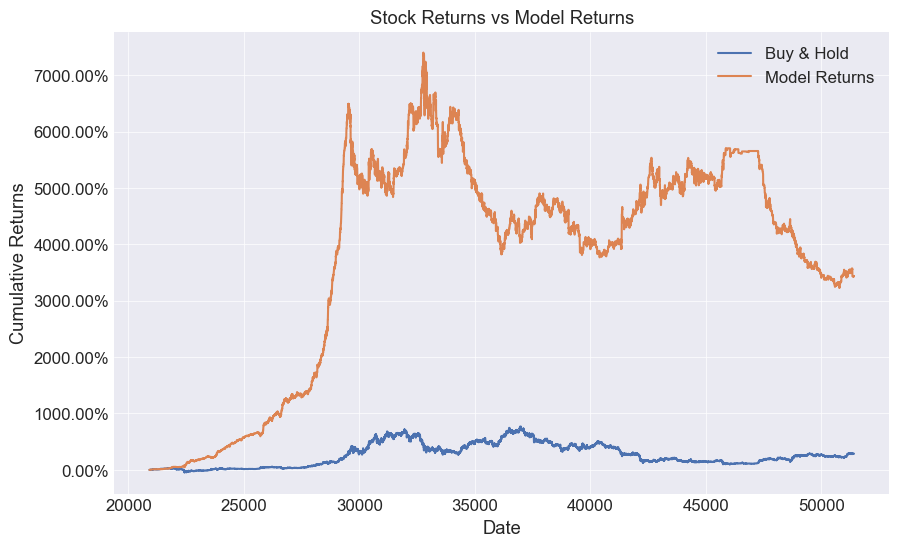


 Buy & Hold Cumulative Returns = 287.13% 
 Model Cumulative Returns = 3436.16%


In [56]:
# Computing Apple stock's cumulative returns
buy_and_hold_total_returns = (1 + X_test['return'] / 100).cumprod()
buy_and_hold_total_returns = (buy_and_hold_total_returns - 1) * 100

# Computing model's cumulative returns
model_cumulative_returns = (1 + X_test['model_returns'] / 100).cumprod()
model_cumulative_returns = (model_cumulative_returns - 1) * 100

# Plotting line plot comparing Buy & Hold and Model 
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(buy_and_hold_total_returns, label = 'Buy & Hold')
ax.plot(model_cumulative_returns, label = 'Model Returns')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Stock Returns vs Model Returns')
# Adding a '%' sign to the y-axis ticks 
def percent_formatter(x, pos):
    return f'{x:.2f}%'
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

plt.style.use('seaborn-v0_8-dark')
plt.grid(True)
plt.show()

# Printing results
print(f'\n Buy & Hold Cumulative Returns = {buy_and_hold_total_returns.iloc[-1]:.2f}% \n Model Cumulative Returns = {model_cumulative_returns.iloc[-1]:.2f}%')

In [58]:
model_returns = (X_test['model_returns'] / 100) # Dividing returns by 100 for decimal return values
aapl_returns = (X_test['return'] / 100) # Dividing returns by 100 for decimal return values

In [62]:
type(aapl_returns)

pandas.core.series.Series

In [1]:
# Comparing Strategy to the Benchmark (Buy & Hold during the same period)
# qs.reports.full(model_returns, benchmark =aapl_returns)